<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


In [2]:
#Funcion que calcula e^-x
def exp(x,n):
    return np.sum([((-x)**i)/np.math.factorial(i) for i in range(n)])

- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

In [3]:
N = 0
x = 0.5
while True:
    A = abs((-x)**(N+1)/np.math.factorial(N+1))
    b = abs(10**(-7)*exp(x,N))
    if A <= b:
        print(f'Valor de N para un x < 1 ---> {N}')
        break
    N += 1

Valor de N para un x < 1 ---> 8


In [4]:
N = 0
x = 10
while True:
    A = abs((-x)**(N+1)/np.math.factorial(N+1))
    b = abs(10**(-7)*exp(x,N))
    if A <= b:
        print(f'Valor de N para un x < 1 ---> {N}')
        break
    N += 1

Valor de N para un x < 1 ---> 45


- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

In [46]:
#Funcion que calcula e^-x
def new_exp(x,n):
    return 1/np.sum([((-x)**i)/np.math.factorial(i) for i in range(n)])

In [48]:
for N in [5,10,25,30]: 
    print('')
    print('para N = ',N)
    for i in range(1,11,3):
         print(f'x = {i}  ---> {abs(new_exp(x,N)-np.exp(-x)):0.5f}; diferencia con np.exp(-x)')


para N =  5
x = 1  ---> 0.00339; diferencia con np.exp(-x)
x = 4  ---> 0.00339; diferencia con np.exp(-x)
x = 7  ---> 0.00339; diferencia con np.exp(-x)
x = 10  ---> 0.00339; diferencia con np.exp(-x)

para N =  10
x = 1  ---> 0.00075; diferencia con np.exp(-x)
x = 4  ---> 0.00075; diferencia con np.exp(-x)
x = 7  ---> 0.00075; diferencia con np.exp(-x)
x = 10  ---> 0.00075; diferencia con np.exp(-x)

para N =  25
x = 1  ---> 2.15381; diferencia con np.exp(-x)
x = 4  ---> 2.15381; diferencia con np.exp(-x)
x = 7  ---> 2.15381; diferencia con np.exp(-x)
x = 10  ---> 2.15381; diferencia con np.exp(-x)

para N =  30
x = 1  ---> 357.18806; diferencia con np.exp(-x)
x = 4  ---> 357.18806; diferencia con np.exp(-x)
x = 7  ---> 357.18806; diferencia con np.exp(-x)
x = 10  ---> 357.18806; diferencia con np.exp(-x)


Vemos que al definir exp(−x) = 1/ exp(x) para grandes valores de n, se obtiene un error menor para valores N pequeños, pero al aumentar N se vuelve a tener un error mayor que el de la funcion exp definida en el punto 1. como se muestra en la figura siguiente

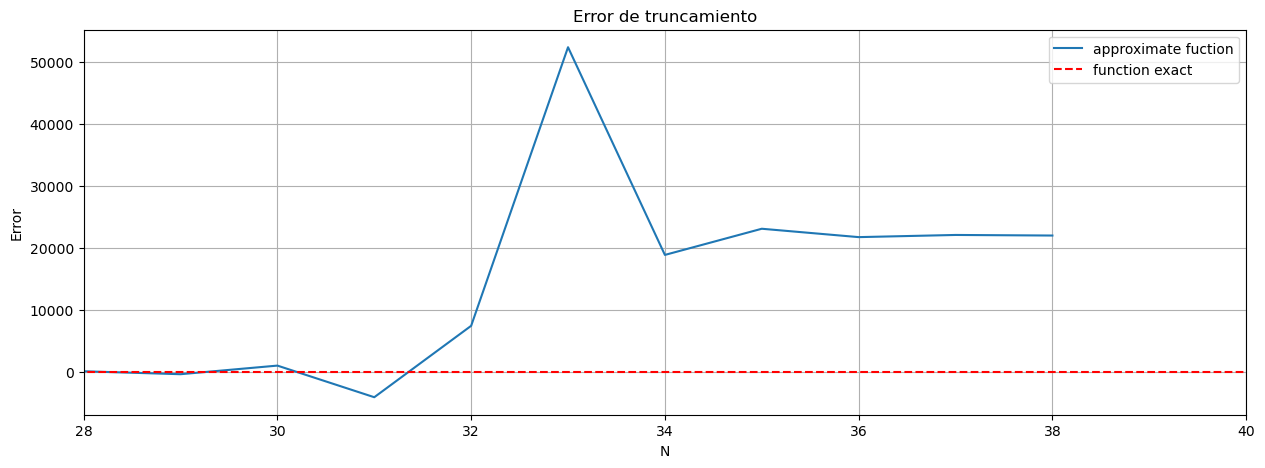

In [58]:
#Para x = 10
plt.figure(figsize=(15,5))
plt.plot([new_exp(10,i) for i in range(1,40)],label='approximate fuction')
plt.plot(np.exp(-10)*np.ones(50),'r--',label='function exact')
plt.title('Error de truncamiento')
plt.xlabel('N')
plt.ylabel('Error')
plt.grid()
plt.xlim(28,40)
plt.legend()

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

In [39]:
for N in [10,25,30,35]: 
    print('')
    print('para N = ',N)
    for i in range(1,11,3):
         print(f'x = {i}  ---> {abs(exp(x,N)-np.exp(-x)):0.5f}; diferencia con np.exp(-x)')


para N =  10
x = 1  ---> 1413.14467; diferencia con np.exp(-x)
x = 4  ---> 1413.14467; diferencia con np.exp(-x)
x = 7  ---> 1413.14467; diferencia con np.exp(-x)
x = 10  ---> 1413.14467; diferencia con np.exp(-x)

para N =  25
x = 1  ---> 0.46424; diferencia con np.exp(-x)
x = 4  ---> 0.46424; diferencia con np.exp(-x)
x = 7  ---> 0.46424; diferencia con np.exp(-x)
x = 10  ---> 0.46424; diferencia con np.exp(-x)

para N =  30
x = 1  ---> 0.00285; diferencia con np.exp(-x)
x = 4  ---> 0.00285; diferencia con np.exp(-x)
x = 7  ---> 0.00285; diferencia con np.exp(-x)
x = 10  ---> 0.00285; diferencia con np.exp(-x)

para N =  35
x = 1  ---> 0.00001; diferencia con np.exp(-x)
x = 4  ---> 0.00001; diferencia con np.exp(-x)
x = 7  ---> 0.00001; diferencia con np.exp(-x)
x = 10  ---> 0.00001; diferencia con np.exp(-x)


In [43]:
for N in [10,25,30,35]: 
    print('para N = ',N)
    for i in [10,30,60,100]:
         print(f'x = {i}  ---> {abs(exp(x,N)-np.exp(-x)):0.5f}; diferencia con np.exp(-x)')

para N =  10
x = 10  ---> 1413.14467; diferencia con np.exp(-x)
x = 30  ---> 1413.14467; diferencia con np.exp(-x)
x = 60  ---> 1413.14467; diferencia con np.exp(-x)
x = 100  ---> 1413.14467; diferencia con np.exp(-x)
para N =  25
x = 10  ---> 0.46424; diferencia con np.exp(-x)
x = 30  ---> 0.46424; diferencia con np.exp(-x)
x = 60  ---> 0.46424; diferencia con np.exp(-x)
x = 100  ---> 0.46424; diferencia con np.exp(-x)
para N =  30
x = 10  ---> 0.00285; diferencia con np.exp(-x)
x = 30  ---> 0.00285; diferencia con np.exp(-x)
x = 60  ---> 0.00285; diferencia con np.exp(-x)
x = 100  ---> 0.00285; diferencia con np.exp(-x)
para N =  35
x = 10  ---> 0.00001; diferencia con np.exp(-x)
x = 30  ---> 0.00001; diferencia con np.exp(-x)
x = 60  ---> 0.00001; diferencia con np.exp(-x)
x = 100  ---> 0.00001; diferencia con np.exp(-x)


De lo anterior se puede concluir que el valor de exp(x) difere de np.exp(-x) cuando x es mayor a 1, lo cual se puede resolver agregando mas terminos a la serie de Taylor

- Make a series of graphs of the error versus N for different values of x.

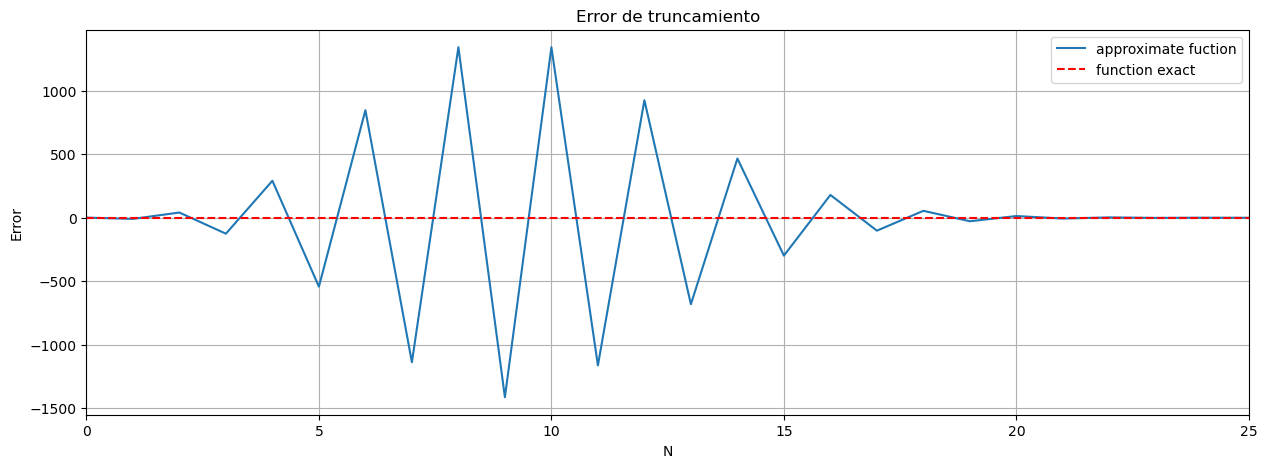

In [5]:
#Para x = 10
plt.figure(figsize=(15,5))
plt.plot([exp(10,i) for i in range(1,50)],label='approximate fuction')
plt.plot(np.exp(-10)*np.ones(50),'r--',label='function exact')
plt.title('Error de truncamiento')
plt.xlabel('N')
plt.ylabel('Error')
plt.grid()
plt.xlim(0,25)
plt.legend()

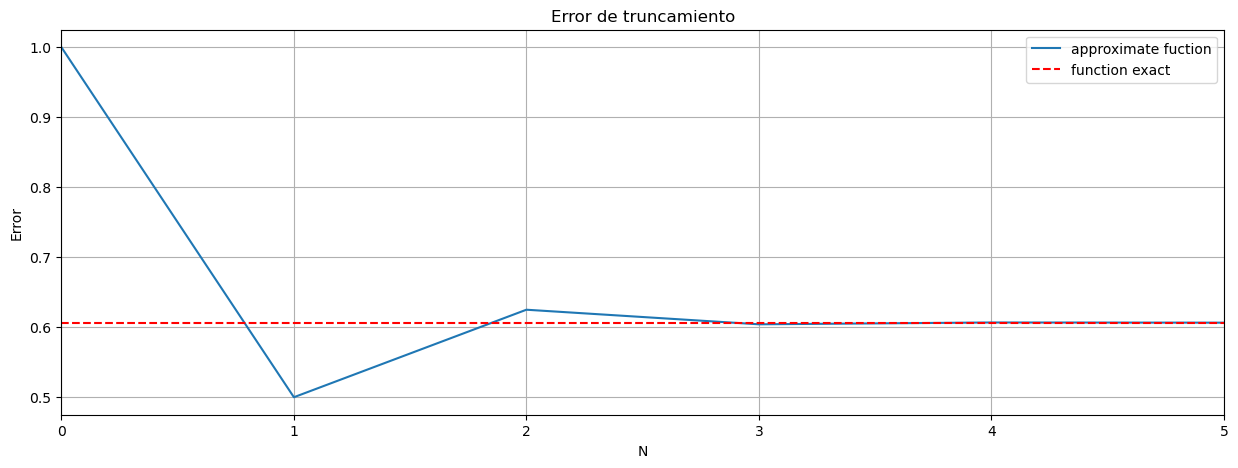

In [6]:
#Para x = 0.5
plt.figure(figsize=(15,5))
plt.plot([exp(0.5,i) for i in range(1,20)],label='approximate fuction')
plt.plot(np.exp(-0.5)*np.ones(20),'r--',label='function exact')
plt.title('Error de truncamiento')
plt.xlabel('N')
plt.ylabel('Error')
plt.grid()
plt.xlim(0,5)
plt.legend()

## Cancelación sustractiva
**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 

\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

In [59]:
def S1(N):
    return np.sum([(-1)**(i)*(i/(i+1)) for i in range(1,2*N+1)])

def S2(N):
    return -np.sum([(2*i -1)/(2*i) for i in range(1,N+1)])+np.sum([(2*i)/(2*i+1) for i in range(1,N+1)])

def S3(N):
    return np.sum([(1)/(2*i*(2*i+1)) for i in range(1,N+1)])

- Estudiar la convergencia de la serie para los tres casos.

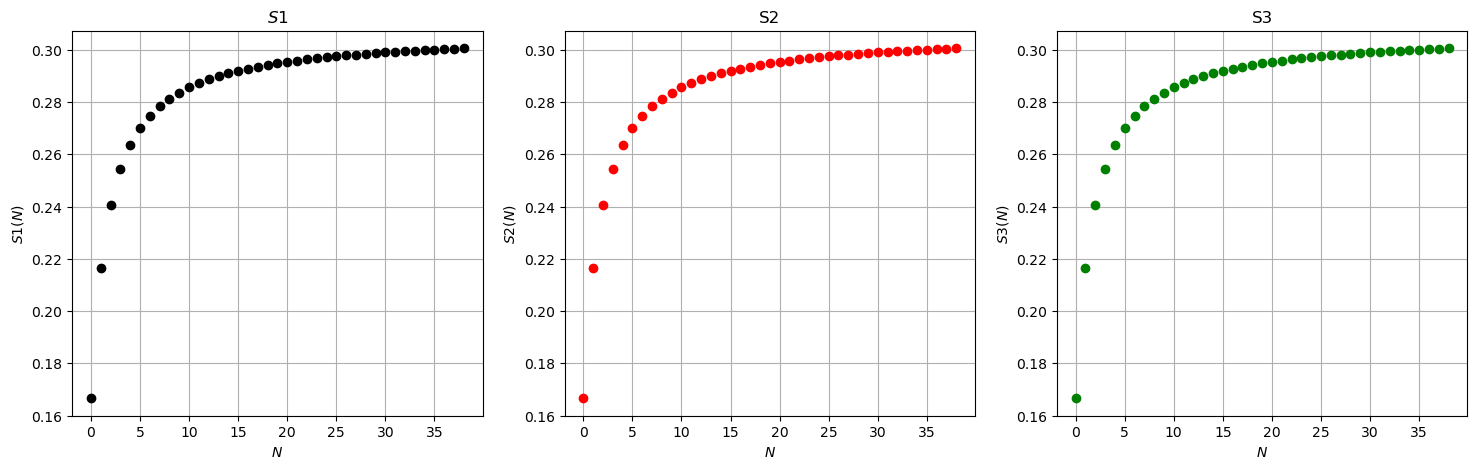

In [77]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
ax = axs.flatten()
ax[0].plot([S1(i) for i in range(1,40)],'ko')
ax[0].set_title('$S1$')
ax[0].set_xlabel('$N$')
ax[0].set_ylabel('$S1(N)$')
ax[0].grid()

ax[1].plot([S2(i) for i in range(1,40)],'ro')
ax[1].set_title('S2')
ax[1].set_xlabel('$N$')
ax[1].set_ylabel('$S2(N)$')
ax[1].grid()


ax[2].plot([S3(i) for i in range(1,40)],'go')
ax[2].set_title('S3')
ax[2].set_xlabel('$N$')
ax[2].set_ylabel('$S3(N)$')
ax[2].grid()

plt.show()

De las grafiacas anteriores se puede observar que todas las series convergen a un mismo valor que esta cerca de 0.30.

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.


Para realizar los gráficos log-log del error relativo en función del número de términos para $S_N^{(1)}$ y $S_N^{(2)}$, primero debemos calcular el valor de cada suma para diferentes valores de $N$ y luego calcular el error relativo en cada caso. Para esto, podemos utilizar el valor exacto de $S_N^{(3)}$ que nos da la solución exacta. En este caso, el valor exacto de $S_N^{(3)}$ es:

\begin{equation}
S_N^{(3)} = \sum_{n=1}^{N}\frac{1}{2n(2n+1)}.
\end{equation}

Entonces, para cada valor de $N$, podemos calcular los valores de $S_N^{(1)}$ y $S_N^{(2)}$ y el error relativo para cada suma:

\begin{align}
E_N^{(1)} &= \frac{|S_N^{(1)} - S_N^{(3)}|}{S_N^{(3)}}\
E_N^{(2)} &= \frac{|S_N^{(2)} - S_N^{(3)}|}{S_N^{(3)}}
\end{align}

Para valores de $N$ grandes, el error relativo debería disminuir con la raíz cuadrada de $N$ para $S_N^{(1)}$ y $S_N^{(2)}$, ya que ambas sumas tienen un comportamiento oscilante.

A continuación se muestran los códigos para generar los gráficos y los gráficos resultantes para $N=10^6$:

In [61]:
def sum1(N):
    s = 0
    for n in range(1, 2*N+1):
        s += (-1)**n * n/(n+1)
    return s

# Función que calcula el valor de la suma S_N^{(2)}
def sum2(N):
    s1 = 0
    s2 = 0
    for n in range(1, N+1):
        s1 += (2*n)/(2*n+1)
        s2 += (2*n-1)/(2*n)
    return s1 - s2

# Función que calcula el valor de la suma S_N^{(3)}
def sum3(N):
    s = 0
    for n in range(1, N+1):
        s += 1/(2*n*(2*n+1))
    return s

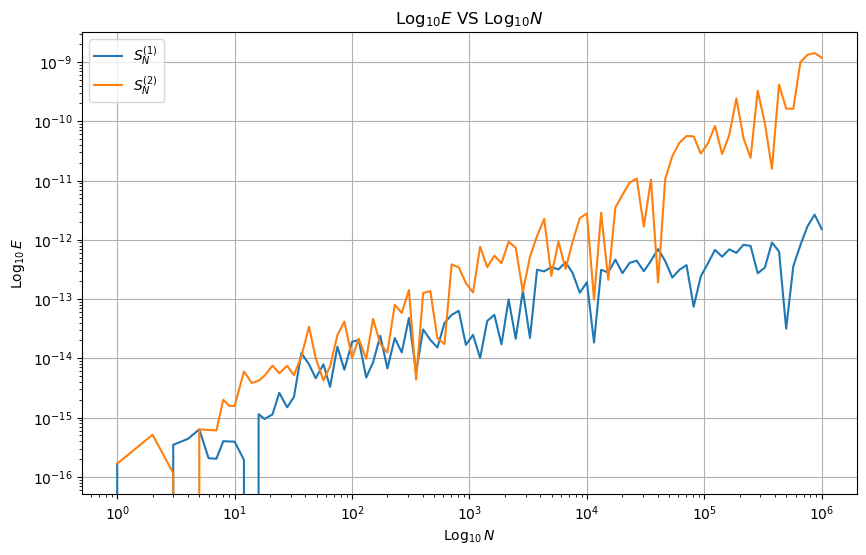

In [78]:
N_values = np.logspace(0, 6, num=100, dtype=int)

# Calcula los errores relativos para S_N^{(1)} y S_N^{(2)}
error1 = []
error2 = []

for N in N_values:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)
    error1.append(abs(s1-s3)/s3)
    error2.append(abs(s2-s3)/s3)

# Graficar los errores relativos en función de N
fig, ax = plt.subplots(figsize=(10, 6))

ax.loglog(N_values, error1, label=r'$S_N^{(1)}$')
ax.loglog(N_values, error2, label=r'$S_N^{(2)}$')
ax.set_xlabel(r'$\mathrm{Log_{10}}\,N$')
ax.set_ylabel(r'$\mathrm{Log_{10}}\,E$')
ax.set_title('$\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$')
ax.legend()
ax.grid()
plt.show()